#Part 1- HDFS What it is and how it works

##HDFS - Distributed file system

HDFS is made for handling very large files that can be distributed in a very large cluster, it does this by breaking this file into blocks, (the blocks are 128 mb by defaut). 

It also allows us to distribute the processing of one of this files, which means that different computers can access different parts of the data and process them in parallel. It also allows the user to know if the computers are accesing the data phycally closest to it so it can access it faster. (When you work with data this large, it matters.)

Hadoop also has automatic backups (it has copies of every block, distributed efficiently) - Basically if a single computer goes down, it is not a big deal.

### HDFS Architecture

The way the architecture works is that there is a single **Name Node**, and this node keeps track of where all blocks live (The individual data nodes) (It has a directory that tells it where to go to find everything), it also mantains an edit log that mantains record of everything that happens.





### Reading a file
Basically you have an application running on some client node that needs to acess data stored on the Hadoop System.

What it does is talk to the name node and say: 
  * "Hey i want to get at this file" - Client node to name node.
  * then the Name node will say "Ok, your file lives on these blocks on these data nodes", 
  * then you client application will know where it needs to go and retrieve which blocks.  

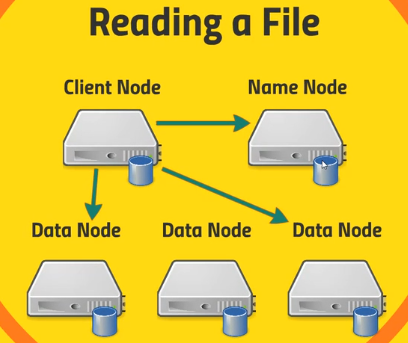

### Writing a file

If the client application wants to create a new file on HDFS, 
1. The Client will tell the name node to create a new file
2. The name node will come back and say "I created a new entry for you, go create it in X data node"
3. Once it has the "OK" the client node talks to a single Data node and passes it the Data/file.
4. Then the data nodes will "talk" to each other to replicate and distribute the data accordingly.
5. If everything goes well, the Client node will get the confirmation that everything went well. 
6. And then the name node will get the confirmation and data of where everything is.


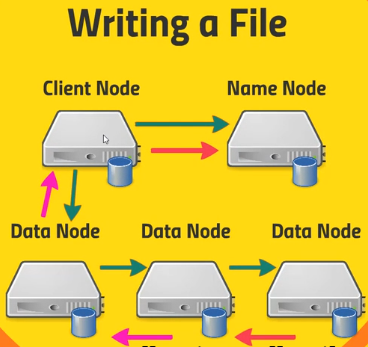

NOTE: Regarding Name Nodes: The Name Node is also backed up around, but only one is activated at the time, if one fails another one goes up instantly.

Hadoop uses many ways to deal with the name node backup:

  * Back Up Metadata- NameNode writes to local disk and NFS(A bakcup data center)
  * Secondary Namemode - Mantains merged copy of edit log you can restore from. (Basically you mantain a copy of the log at all times)
  *  HDFS Fedreration - Each Namemode manages a specific namespace volume (Many namenodes and you have to have many namenodes managing different sections of your operation).
  * HDFS High Availability (When you absolutely do not want any downtime). 
    * It has a hot standby namenode using shared edit log. (Basically really reliable backup name nodes)
    * Zookeper tracks active namenode
    * Uses extreme measures to ensure only one namenode is used at the time.
    * Note: This is hard to configure and has more failing points/vulnerabilities.

## UsingHDFS:

* Use **Ambari**
* Command Line Interface
* HTTP/HDFS Proxies
* Java interface
* NFS Gateway


# Part 2. Installing The movieLensDataset.

1. Start Hortonworks Docker
2. Login (maria_dev, maria_dev)
3. Click On HDFS


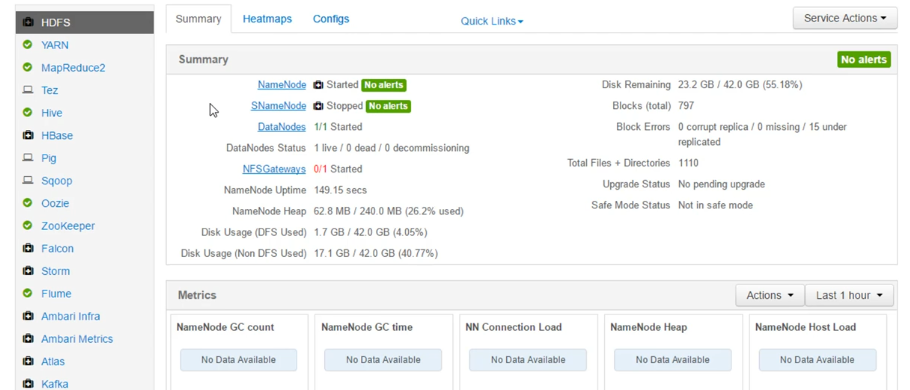

We can see we are running a NameNode and a Data Node (here both are in the same machine, but in reality they would be in separate computers)

4. Click on the grid and press Files View, and this will show you the entire HDFS Filesystem (like a windows folder).

5. You can go to any directory and create a new folder just by clicking new folder. (here it is ml-100k)

6. In the folder you can click the upload button and simply upload files from your harddrive. - It goes through the write file process and then it gives you confirmation that everything went well.

7. you can click on any file (eg u.data that we uploaded) (or select many) and click on open and you can see the data. (You can also rename files, download, dekete, copy, etc...)

8. 





# Part 3. Install the MovieLens dataset using command line.



Note: On windows you can use Msys terminal or PuTTY, here we use PuTTY (in mac or unix just use their terminal)

1. In PuTTY to connect you open the application and place the following data in it.

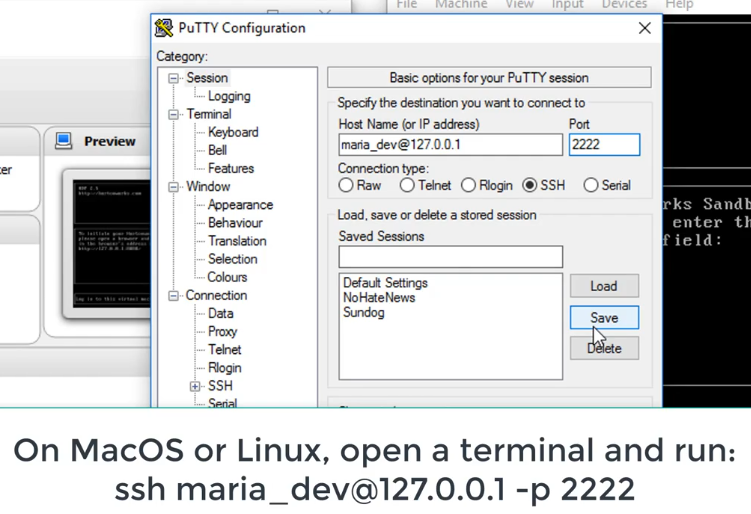

The you save it as  HDP (press save) and then you click Open.

2. A Command line will open, in it you type the password (maria_dev) and you are in.

3. To manipulate hadoop you use the hadoop command and then you write your commands eg. $ hadoop fs -ls (this shows the content of the home directory)

4. To create a directory:  
`hadoop fs -mkdir ml-100k`
Then you can see the created folder using `hadoop fs -ls`

5. To upload information you have to first upload the data into the linux host itself (PuTTY), you use: `wget http://media.sundog-soft.com/hadoop/ml-100k/u.data` That basically is how you would download the data on Linux.

6. To upload the data into HDFS: `hadoop fs -copyFromLocal u.data ml-100k/u.data` (Note, this starts from the directory you are in, in PuTTY). Now this copies from the local data host into HDFS

7. To remove the data you use: `hadoop fs -rm ml-100k/u.data`, you can also remove the directory itself `hadoop fs -rmdir ml-100k`

NOTE: if you type `hadoop fs` it gives you the list of commands you can use. 

8. Write `exit`





#4. Map Reduce what it is and how it works

## Why MapReduce?

* Distributes the processing of data on your cluster.

* Divides your data up into partitions that are Mapped (Transformed) and Reduced (agreggated) by mapper and reducer functions you define

* Resilient to failute - an application master monitors your mappers and reducers on each partition



Example: 
  * How many movies did each user rate in the MovieLens data set?
    - We have a user ID.
    1. We transform the raw input data from the dataset into a format that makes sense for us. So our mapper needs to take each line of input data (the individual movie ratings), and it will transform it into a key value pair. 
      - The key is the value you want to aggregate on, in this case we want to aggregate the number of movies that each user watched. (In this example our key would be User ID).
      - The value would be the number of movies that we are aggregating. 
      - Our mapper takes each input line of our u.data file and convert that into key value pair where the key is the user id and the value is the movie that that user rated.
      - Note: You may have the same key(U-id) happening more than one time in the output. At this stage there is no problem if we have the same key appearing multiple times.
      - Note:  The information we dont need gets "thrown out of the window", basically every column we dont need, gets removed.
    - 1.1 Now our mapper function transforms each line of data into a given key value pair, so that the mapper function that we write in some programming language will be called for each individual line of input data.
    - 1.2 Lets say that a line comes and it saying that user 196 rated movie 242 and more data, the mapper removes anything we dont want and gives just key:value pairs .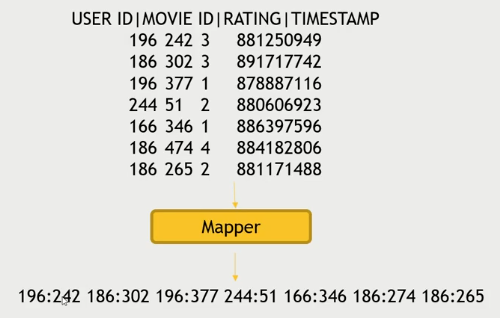

* (cont)
 * (cont)
 2. After this is done, MapReduce automatically does a "shuffle and sort" Where it actually aggregates togheter all the given values for each unique key and sorts those keys.
 * 2.1 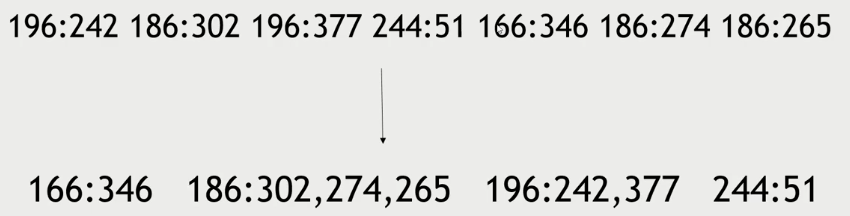



* (cont)

  * You can see it aggregates and sorts the values.
  3. Now you can use a reducer to define what to do with this values, in this example we tell MapReducer to count the lenght of the list.
  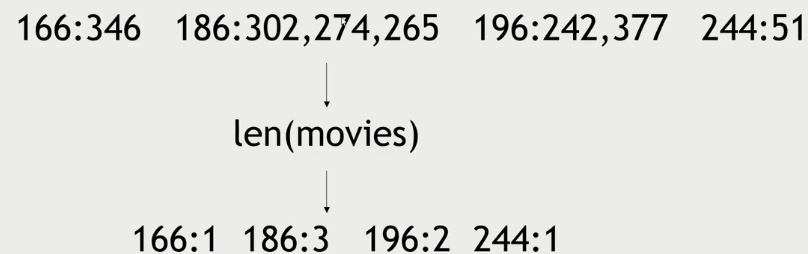

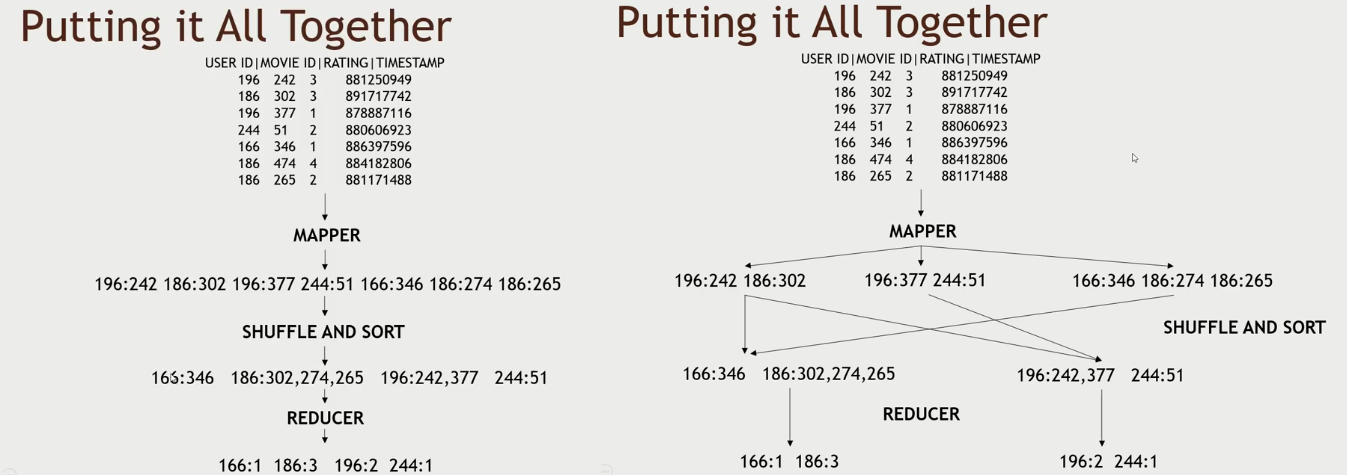![image.png]()

# 5. How MapReduce distributes processing

Here we go with the same example, in the previous image we can say:

1. Get the data through the mapper, and the mapper decides to chop the data into three parts (sends some lines to each node). You carve up your input data into different partitions and then assign each node to a partition to process.
  - Hadoop then just keeps track of when the processing is done.

2. Then data gets send to reducers, again, the data might be sent to any computer to process and hadoop keeps track of when the process is done.



## The anatomy of a MapReduceJob

You kick things off from a client node -> There is a resource manager (YARN) that's keeping track of all the different computers and what has availability -> then you have an Application Master (NodeManager) keeping an eye on all tasks, and on the PC's. 

Also everything is talking to our HDFS cluster.

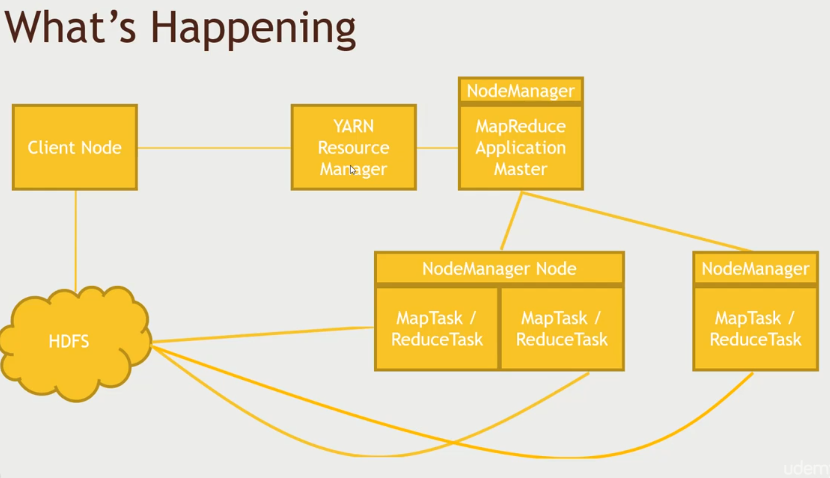

 ## How are mappers and reduce written?

* MapReduce is natively Java
* STREAMING allows interfacing to other languages (ie Python)



## How is Falute handled

* Application master monitors worker tasks for errors or hanging.
  - Restarts as needed
  - Preferably on a different node.
* What if the application master goes down?
  - YARN can try to restart it
* What if an enitre Node goes down?
  - This could be the application master
  - The resource manager will try to restart it.

* What if the resource manager goes down?
  - Can set up "high availability" (HA) using Zookeeper to have a hot standby.
    + Basically map reduce can always talk to Zookeeper first to figure out where is my resource manager, and if one fails Zookeeper redirects to another manager.
    

# 6. MapReduce example Break down movie reviews

How many of each rating type exists in the movieLens dataSet (how many one-star, how many two-star, etc...).

1. Here basically the Key is the rating, the value is just assinged as 1.

2. Then MapReduce will collect all the ones associated with each rating

3. Reduce will count all ones togheter.

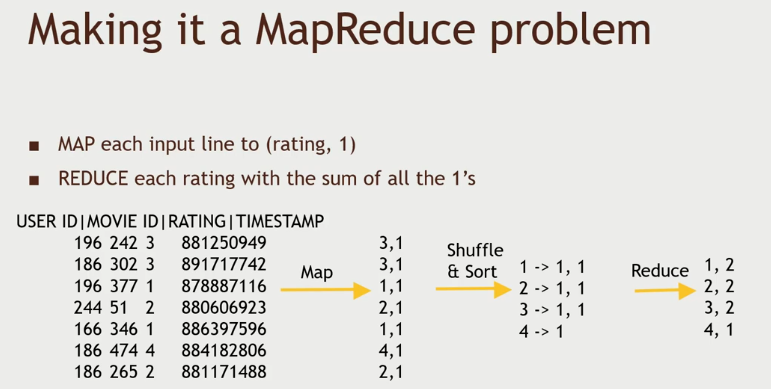

Here we use STREAMING to be able to write the code in python

In [0]:
#Basically take every line, and return the rating, 1  
def mapper_get_ratings(self, _, line): #mappers recieve 3 parameters, (Note: This is part of a class)
  #The second parameter is usually not used but if necessary it might be a key comming from another reducer (A chain)
  #The line is the input line
  (userID, movieID, rating, timestamp) = line.split('\t') #split the line on tab
  yield rating, 1 #return tuple

In [0]:
#The reducer
def reducer_count_ratings(self, key, values):
  yield key, sum(values) #return tuple of key and the sum of the values
    #Sum of the ones

Putting it all togheter:

In [0]:
!pip install mrjob

     |████████████████████████████████| 440kB 1.4MB/s 


This below is RatingsBreakdown.py

In [0]:
#mrjob is to be able to write mapReduce on python
from mrjob.job import MRJob
from mrjob.step import MRStep 

class RatingsBreakdown(MRJob): #RatingsBreakdown inherits from MRJob package
  def steps(self):
    return [ #This tells the framework what jobs are used for mappers and reducers in our jobs
            MRStep(mapper = self.mapper_get_ratings, #we have a single step,
                    #A single map reduce phase, where the mapper is our mapper_get_ratings function
                   reducer=self.reducer_count_ratings) #The reducer is our reducer_count_ratings function
    ]
  def mapper_get_ratings(self,_,line):
    (userID, movieID, rating, timestamp) = line.split('\t')
    yield rating, 1
  
  def reducer_count_ratings(self, key, values):
    yield key, sum(values)

if __name__ ==  '__main__':
  RatingsBreakdown.run()
  

usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 7. (Se pasa a 8 directo)
# 8. Installing python MRJob and nano

Nano is a text editor, you can use pip to install everything we need.

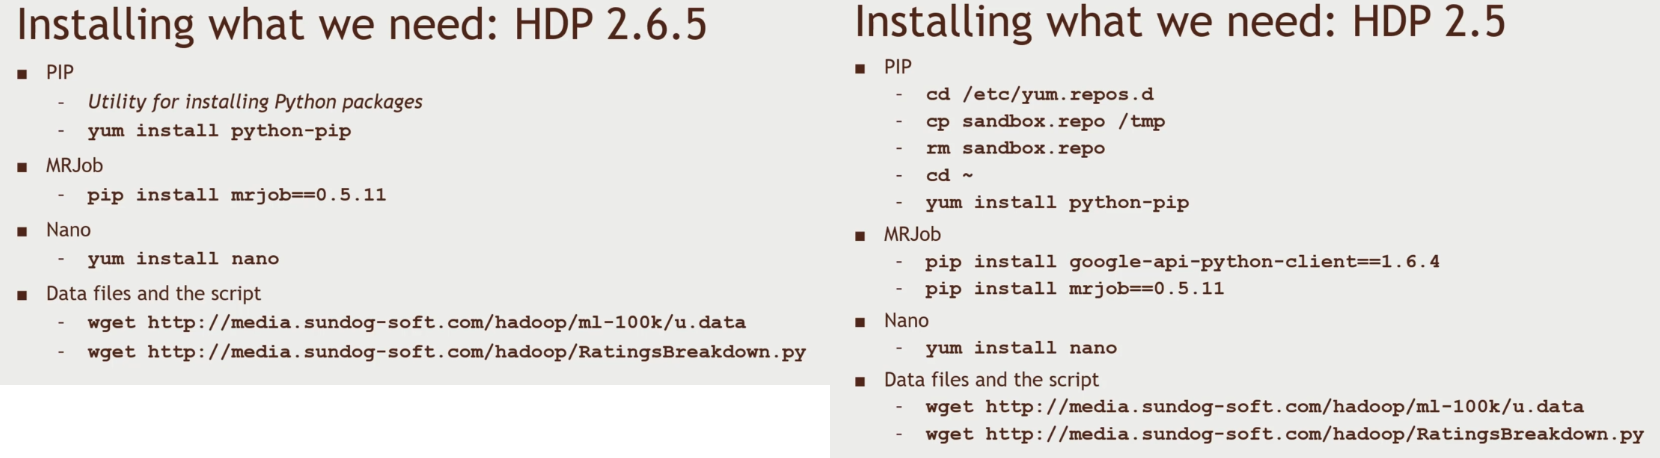

Walkthorugh:

1. Open PuTTY (connect to maria_dev@127.0.0.1 port 2222

2. We log in as root: `$ su root`
  * The initial password for root is haddop
  * It will require you to change the password to anything.
  * Note: You know you are root because instead of $ before the code you see a #.

3. Install pip: `yum install python-pip` <- for htp 2.6.5
  * For HDP 2.5: `cd /etc/yum.repos.d` ->  `cp sandbox.repo /tmp` -> `rm sandbox.repo` -> say yes -> `cd ~` -> `yum install python-pip`.

4. Install MRJob: `pip install mrjob`.
  * For HDP 2.5 -> `pip insall google-api-python-client` -> `pip install mrjob`

5. Install nano: `yum install nano`

6. Download the data and script we want to use: `wget ..... (see image)`


# 9. Code up the ratings histogram MapReduce job and run it

## Running with mrjob.

* Run locally
  - python RatingsBreakdown.py u.data

* Run with Hadoop
  - python MostPopularMovie.py -r hadoop --hadoop-streaming-jar/usr/hdp/current/hadoop-mapreduce-client/hadoop-streaming.jar u.data   
    + here mrjob does not know how to find it automatically, so we need to tell it where it is.


We use the nano text editor and open the file we built with the class (RatingsBreakdown.py)

1. To see the file `nano RatingsBreakdown.py`

2. to run the file `python RatingsBreakdown.py u.data`

And you get your results.

To run this using hadoop:

NOTE: this is all in PuTTY.
NOTE2: We have to have haddop running
`python RatingsBreakdown.py -r hadoop --hadoop-straming-jar /usr/hdp/current/hadoop-mapreduce-client/hadoop-streaming.jar hdfs://PATH_TO_DATAFILE`, note if you are just working on local, instead of the hdfs:// you just write `u.data` (name of your file) 

# 10 and 11. Rank movies by their popularity

This is a challenge excercice:

* Count up ratings given for each movie.
  - All you need is to change one thing in the mapper - we don't care about ratings for now, we care about movies ID's
  - Start with this and make sure you can do it.
  - You can use nano to just edit the existing RatingsBreakdown.py script

  

In [0]:
#mrjob is to be able to write mapReduce on python
#This one includes secondary goal
from mrjob.job import MRJob
from mrjob.step import MRStep 

class RatingsBreakdown(MRJob): #RatingsBreakdown inherits from MRJob package
  def steps(self):
    return [ #This tells the framework what jobs are used for mappers and reducers in our jobs
            MRStep(mapper = self.mapper_get_ratings, #we have a single step,
                    #A single map reduce phase, where the mapper is our mapper_get_ratings function
                   reducer=self.reducer_count_ratings), #The reducer is our reducer_count_ratings function
                   MRStep(reducer = self.reducer_sorted_output) 
    ]
  def mapper_get_ratings(self,_,line):
    (userID, movieID, rating, timestamp) = line.split('\t')
    yield movieID, 1 #Literally the only change (first goal).
                      #Key es movie ID, values es el 1.
  def reducer_count_ratings(self, key, values):
    yield str(sum(values)).zfill(5), key
                            #Aqui es como si pasaras el resultado del anterior (la sum) luego (la key)
  def reducer_sorted_output(self,count,movies):
    for movie in movies:
      yield movie, count

if __name__ ==  '__main__':
  RatingsBreakdown.run()
  

The secondary goal:

* Sort the movies by their numbers of ratings:
  - Strategy:
    + Map to (movieID,1) key/value pairs
    + Reduce with output of (rating count, movieID)
    + Send this to a second reducer so we end up with things sorted by rating count.

  - Gotchas:
    + How do we set up more than one MapReduce step?
    + How do we ensure the rating counts are sorted properly.
      * By default streaming treats all input and output as strings. So things get sorted as strings, not numerically.
      * There are different formats you can specify, but the easiest way is to zero-pad your data. You could also tell Hadoop to use formats as JSON that perserve data types, etc...
